In [28]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols
data = pd.read_csv("C:/Users/noshi/Desktop/poralekha/Sem8/SoftwareMetrics/survey_results_public.csv")
data = data.replace('NA', np.nan)
#data.head
#list(data.columns.values)
print(data.shape)

(64461, 61)


In [29]:
data['Hobbyist'].value_counts()
#data['Hobbyist'] = data[np.isfinite(data['Hobbyist'])]
data['Hobbyist'] = data['Hobbyist'].map({'Yes': 1, 'No': 2})
data['JobSat'].value_counts()
data['JobSat'] = data['JobSat'].map({'Very dissatisfied': 1, 'Slightly dissatisfied': 2,
                                    'Neither satisfied nor dissatisfied': 3, 'Slightly satisfied': 4,
                                    'Very satisfied': 5})
data['ConvertedComp'].value_counts()

120000.0     341
100000.0     306
150000.0     277
2000000.0    258
1000000.0    258
            ... 
102700.0       1
68721.0        1
96250.0        1
38456.0        1
21487.0        1
Name: ConvertedComp, Length: 6958, dtype: int64

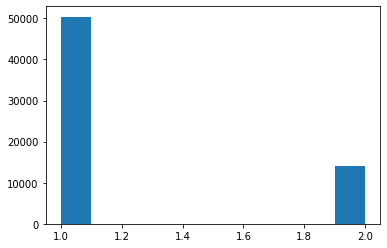

In [30]:
#histogram for normality check
plt.hist(data['Hobbyist'])
plt.show() 

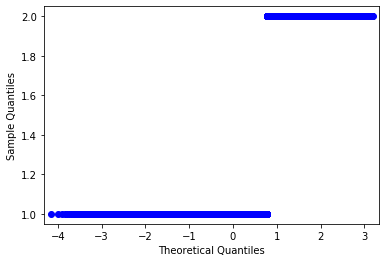

In [31]:
# q-q plot
qqplot(data['Hobbyist'], line='s')
plt.show()

G:\anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
G:\anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


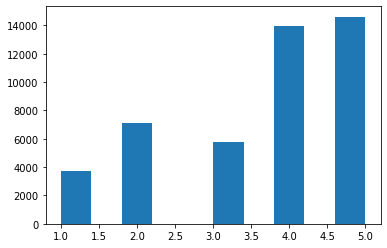

In [32]:
plt.hist(data['JobSat'])
plt.show() 

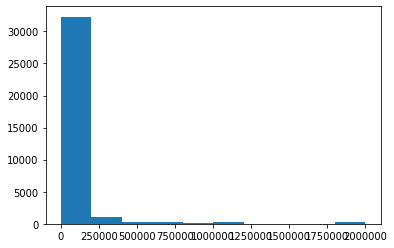

In [33]:
plt.hist(data['ConvertedComp'])
plt.show() 

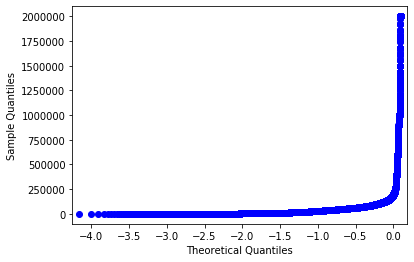

In [34]:
# q-q plot
qqplot(data['ConvertedComp'], line='s')
plt.show()

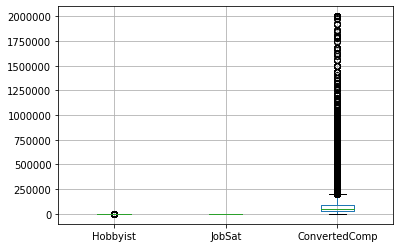

In [35]:
#checking equal variance with boxplot
boxplot = data.boxplot(column=['Hobbyist', 'JobSat', 'ConvertedComp'])

In [36]:
#perform two-way ANOVA
model = ols('ConvertedComp ~ C(Hobbyist) + C(JobSat) + C(Hobbyist):C(JobSat)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Hobbyist),6.034252e+10,1.0,1.173190,2.787544e-01
C(JobSat),4.096123e+12,4.0,19.909382,2.170888e-16
C(Hobbyist):C(JobSat),1.390241e+11,4.0,0.675732,6.087068e-01
Residual,1.784317e+15,34691.0,NaN,NaN


In [37]:
#Since the p-values for Hobbyist and JobSat are both less than .05, 
#this means that both factors have a statistically significant effect on ConvertedComp.

#And since the p-value for the interaction effec is less than .05, 
#this tells us that there is significant interaction effect between Hobbyist and JobSat.

G:\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
G:\anaconda\lib\site-packages\scipy\stats\morestats.py:1044: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


ValueError: supplied range of [0.0, inf] is not finite

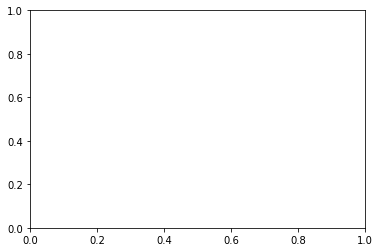

In [38]:
from numpy import exp
from scipy.stats import boxcox
# transform to be exponential
data['ConvertedComp'] = exp(data['ConvertedComp'])
# power transform
data['ConvertedComp'] = boxcox(data['ConvertedComp'], 0)
plt.hist(data['ConvertedComp'])
plt.show() 